In [1]:
!pip install statsmodels
!pip install scikit-learn
!pip install ISLP

In [2]:
import ISLP
from ISLP import load_data
from statsmodels.datasets import get_rdataset

import numpy as np
import pandas as pd

In [3]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [151]:
import os
print(os.getcwd())

C:\Users\Franco\Documents\GitHub\Big-Data---TP-2---Grupo-13\t104_dta


In [153]:
os.chdir("C:\Users\Franco\Documents\GitHub\Big-Data---TP-2---Grupo-13\t104_dta")

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 2-3: truncated \UXXXXXXXX escape (2283443457.py, line 1)

In [155]:
tabla = pd.read_stata("Hogar_t104.dta")

In [156]:
tabla.columns


Index(['CODUSU', 'nro_hogar', 'realizada', 'ano4', 'trimestre', 'region',
       'mas_500', 'aglomerado', 'pondera', 'iv1', 'iv1_esp', 'iv2', 'iv3',
       'iv3_esp', 'iv4', 'iv5', 'iv6', 'iv7', 'iv7_esp', 'iv8', 'iv9', 'iv10',
       'iv11', 'iv12_1', 'iv12_2', 'iv12_3', 'ii1', 'ii2', 'ii3', 'ii3_1',
       'ii4_1', 'ii4_2', 'ii4_3', 'ii5', 'ii5_1', 'ii6', 'ii6_1', 'ii7',
       'ii7_esp', 'ii8', 'ii8_esp', 'ii9', 'v1', 'v2', 'v21', 'v22', 'v3',
       'v4', 'v5', 'v6', 'v7', 'v8', 'v9', 'v10', 'v11', 'v12', 'v13', 'v14',
       'v15', 'v16', 'v17', 'v18', 'v19_a', 'v19_b', 'IX_Tot', 'IX_Men10',
       'IX_Mayeq10', 'itf', 'decifr', 'idecifr', 'rdecifr', 'gdecifr',
       'pdecifr', 'adecifr', 'ipcf', 'deccfr', 'ideccfr', 'rdeccfr', 'gdeccfr',
       'pdeccfr', 'adeccfr', 'vii1_1', 'vii1_2', 'vii2_1', 'vii2_2', 'vii2_3',
       'vii2_4', 'idimph'],
      dtype='object')

In [157]:
tabla.head(5)

,CODUSU,nro_hogar,realizada,ano4,trimestre,region,mas_500,aglomerado,pondera,iv1,...,gdeccfr,pdeccfr,adeccfr,vii1_1,vii1_2,vii2_1,vii2_2,vii2_3,vii2_4,idimph
0,125051,1.0,Sí,2004.0,1er. Trimestre,Pampeana,S,Gran La Plata,355.0,Casa,...,01,,01,1.0,0.0,3.0,0.0,0.0,0.0,00000
1,125082,1.0,Sí,2004.0,1er. Trimestre,Pampeana,S,Gran La Plata,306.0,Casa,...,03,,02,2.0,0.0,98.0,0.0,0.0,0.0,10000
2,125181,1.0,Sí,2004.0,1er. Trimestre,Pampeana,S,Gran La Plata,541.0,Casa,...,09,,09,2.0,0.0,1.0,3.0,0.0,0.0,00000
3,125283,1.0,Sí,2004.0,1er. Trimestre,Pampeana,S,Gran La Plata,255.0,Casa,...,07,,07,1.0,2.0,3.0,4.0,0.0,0.0,10000
4,126192,1.0,Sí,2004.0,1er. Trimestre,Pampeana,S,Gran La Plata,218.0,Casa,...,08,,08,2.0,0.0,Otra persona que no vive en el hogar,0.0,0.0,0.0,10000


In [160]:
tabla[3200:3205]

,CODUSU,nro_hogar,realizada,ano4,trimestre,region,mas_500,aglomerado,pondera,iv1,...,gdeccfr,pdeccfr,adeccfr,vii1_1,vii1_2,vii2_1,vii2_2,vii2_3,vii2_4,idimph
3200,265873,1.0,Sí,2004.0,1er. Trimestre,NEA,N,Gran Resistencia,226.0,Casa,...,,05,06,2.0,0.0,98.0,0.0,0.0,0.0,00000
3201,266176,1.0,Sí,2004.0,1er. Trimestre,NEA,N,Gran Resistencia,155.0,Casa,...,,05,06,1.0,0.0,2.0,0.0,0.0,0.0,00000
3202,266266,1.0,Sí,2004.0,1er. Trimestre,NEA,N,Gran Resistencia,188.0,Casa,...,,03,04,2.0,4.0,98.0,0.0,0.0,0.0,00000
3203,267089,1.0,Sí,2004.0,1er. Trimestre,NEA,N,Gran Resistencia,240.0,Casa,...,,02,02,1.0,2.0,5.0,0.0,0.0,0.0,00000
3204,267359,1.0,Sí,2004.0,1er. Trimestre,NEA,N,Gran Resistencia,225.0,Casa,...,,02,02,2.0,0.0,98.0,0.0,0.0,0.0,00100


In [162]:
tabla.drop(["trimestre","ano4"], axis=1)

,CODUSU,nro_hogar,realizada,region,mas_500,aglomerado,pondera,iv1,iv1_esp,iv2,...,gdeccfr,pdeccfr,adeccfr,vii1_1,vii1_2,vii2_1,vii2_2,vii2_3,vii2_4,idimph
0,125051,1.0,Sí,Pampeana,S,Gran La Plata,355.0,Casa,,2.0,...,01,,01,1.0,0.0,3.0,0.0,0.0,0.0,00000
1,125082,1.0,Sí,Pampeana,S,Gran La Plata,306.0,Casa,,4.0,...,03,,02,2.0,0.0,98.0,0.0,0.0,0.0,10000
2,125181,1.0,Sí,Pampeana,S,Gran La Plata,541.0,Casa,,2.0,...,09,,09,2.0,0.0,1.0,3.0,0.0,0.0,00000
3,125283,1.0,Sí,Pampeana,S,Gran La Plata,255.0,Casa,,3.0,...,07,,07,1.0,2.0,3.0,4.0,0.0,0.0,10000
4,126192,1.0,Sí,Pampeana,S,Gran La Plata,218.0,Casa,,4.0,...,08,,08,2.0,0.0,Otra persona que no vive en el hogar,0.0,0.0,0.0,10000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12811,283186,1.0,Sí,Pampeana,N,Río Cuarto,272.0,Casa,,3.0,...,,04,03,1.0,0.0,98.0,0.0,0.0,0.0,00000
12812,284685,1.0,Sí,Pampeana,N,Río Cuarto,397.0,Casa,,4.0,...,,05,04,2.0,0.0,98.0,0.0,0.0,0.0,00000
12813,285584,1.0,Sí,Pampeana,N,Río Cuarto,130.0,Casa,,6.0,...,,09,09,Otra persona que no vive en el hogar,0.0,98.0,0.0,0.0,0.0,00100
12814,287302,2.0,Sí,Pampeana,N,Río Cuarto,153.0,Casa,,3.0,...,,02,02,2.0,0.0,6.0,0.0,0.0,0.0,00000


In [165]:
df2004 = tabla[tabla["region"]=="Gran Buenos Aires"]
df2004.columns = df2004.columns.str.lower()
df2004


,codusu,nro_hogar,realizada,ano4,trimestre,region,mas_500,aglomerado,pondera,iv1,...,gdeccfr,pdeccfr,adeccfr,vii1_1,vii1_2,vii2_1,vii2_2,vii2_3,vii2_4,idimph
9666,125098,1.0,Sí,2004.0,1er. Trimestre,Gran Buenos Aires,S,Ciudad de Buenos Aires,1299.0,Departamento,...,06,,04,1.0,0.0,98.0,0.0,0.0,0.0,00000
9667,125397,1.0,Sí,2004.0,1er. Trimestre,Gran Buenos Aires,S,Ciudad de Buenos Aires,2018.0,Departamento,...,00,,00,1.0,0.0,98.0,0.0,0.0,0.0,00000
9668,125515,1.0,Sí,2004.0,1er. Trimestre,Gran Buenos Aires,S,Ciudad de Buenos Aires,1486.0,Departamento,...,07,,05,1.0,0.0,98.0,0.0,0.0,0.0,00010
9669,125558,1.0,Sí,2004.0,1er. Trimestre,Gran Buenos Aires,S,Ciudad de Buenos Aires,1674.0,Departamento,...,08,,06,2.0,0.0,3.0,4.0,0.0,0.0,00000
9670,125599,1.0,Sí,2004.0,1er. Trimestre,Gran Buenos Aires,S,Ciudad de Buenos Aires,1471.0,Casa,...,04,,02,2.0,0.0,1.0,0.0,0.0,0.0,00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12012,287684,1.0,Sí,2004.0,1er. Trimestre,Gran Buenos Aires,S,Partidos del GBA,1605.0,Casa,...,07,,08,3.0,0.0,2.0,4.0,0.0,0.0,00000
12013,287810,1.0,Sí,2004.0,1er. Trimestre,Gran Buenos Aires,S,Partidos del GBA,1539.0,Casa,...,08,,09,2.0,0.0,3.0,1.0,0.0,0.0,00000
12014,287998,1.0,Sí,2004.0,1er. Trimestre,Gran Buenos Aires,S,Partidos del GBA,1466.0,Casa,...,01,,01,1.0,0.0,2.0,0.0,0.0,0.0,00000
12015,288171,1.0,Sí,2004.0,1er. Trimestre,Gran Buenos Aires,S,Partidos del GBA,1454.0,Casa,...,08,,09,Servicio doméstico,0.0,2.0,0.0,0.0,0.0,00000


In [167]:
dfarg=pd.read_excel("usu_hogar_T124.xlsx")

In [168]:
df2024=dfarg[dfarg["REGION"]==1]

In [169]:
df2024.columns = df2024.columns.str.lower()


In [170]:
df2024.columns

Index(['codusu', 'ano4', 'trimestre', 'nro_hogar', 'realizada', 'region',
       'mas_500', 'aglomerado', 'pondera', 'iv1', 'iv1_esp', 'iv2', 'iv3',
       'iv3_esp', 'iv4', 'iv5', 'iv6', 'iv7', 'iv7_esp', 'iv8', 'iv9', 'iv10',
       'iv11', 'iv12_1', 'iv12_2', 'iv12_3', 'ii1', 'ii2', 'ii3', 'ii3_1',
       'ii4_1', 'ii4_2', 'ii4_3', 'ii5', 'ii5_1', 'ii6', 'ii6_1', 'ii7',
       'ii7_esp', 'ii8', 'ii8_esp', 'ii9', 'v1', 'v2', 'v21', 'v22', 'v3',
       'v4', 'v5', 'v6', 'v7', 'v8', 'v9', 'v10', 'v11', 'v12', 'v13', 'v14',
       'v15', 'v16', 'v17', 'v18', 'v19_a', 'v19_b', 'ix_tot', 'ix_men10',
       'ix_mayeq10', 'itf', 'decifr', 'idecifr', 'rdecifr', 'gdecifr',
       'pdecifr', 'adecifr', 'ipcf', 'deccfr', 'ideccfr', 'rdeccfr', 'gdeccfr',
       'pdeccfr', 'adeccfr', 'pondih', 'vii1_1', 'vii1_2', 'vii2_1', 'vii2_2',
       'vii2_3', 'vii2_4'],
      dtype='object')

In [171]:
df2024

,codusu,ano4,trimestre,nro_hogar,realizada,region,mas_500,aglomerado,pondera,iv1,...,gdeccfr,pdeccfr,adeccfr,pondih,vii1_1,vii1_2,vii2_1,vii2_2,vii2_3,vii2_4
5,TQRMNOSPRHLMNNCDEIIAD00854888,2024,1,1,1,1,S,32,2018,2,...,7.0,NaN,5,2564,1,0,98,0,0,0
6,TQRMNOSPTHLMNNCDEIIAD00854889,2024,1,1,1,1,S,32,5805,1,...,12.0,NaN,12,0,2,0,98,0,0,0
7,TQRMNOTXUHKNNPCDEIIAD00856793,2024,1,1,1,1,S,32,817,1,...,10.0,NaN,10,1782,2,0,98,0,0,0
8,TQRMNOSQVHJLMUCDEIIAD00798163,2024,1,1,1,1,S,32,1921,2,...,12.0,NaN,12,0,96,0,98,0,0,0
9,TQRMNORXVHJLNNCDEIIAD00798156,2024,1,1,1,1,S,32,2211,2,...,1.0,NaN,1,2655,1,0,98,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15983,TQRMNOPSSHKMROCDEIJAH00861731,2024,1,1,1,1,S,33,3772,1,...,10.0,NaN,10,5211,1,0,96,0,0,0
15984,TQRMNOPWVHJLSSCDEIJAH00794914,2024,1,1,1,1,S,33,1862,1,...,2.0,NaN,2,4520,4,2,98,0,0,0
15985,TQRMNOQQWHKMOQCDEIJAH00861732,2024,1,1,1,1,S,33,2639,1,...,12.0,NaN,12,0,2,0,98,0,0,0
15986,TQRMNOSXRHKMNMCDEIJAH00861733,2024,1,1,1,1,S,33,1497,2,...,10.0,NaN,10,2000,1,0,98,0,0,0


In [172]:
dffinal=pd.concat([df2004,df2024])

In [173]:
dffinal.tail()

,codusu,nro_hogar,realizada,ano4,trimestre,region,mas_500,aglomerado,pondera,iv1,...,pdeccfr,adeccfr,vii1_1,vii1_2,vii2_1,vii2_2,vii2_3,vii2_4,idimph,pondih
15983,TQRMNOPSSHKMROCDEIJAH00861731,1.0,1,2024.0,1,1,S,33,3772.0,1,...,NaN,10,1,0,96,0,0,0,NaN,5211.0
15984,TQRMNOPWVHJLSSCDEIJAH00794914,1.0,1,2024.0,1,1,S,33,1862.0,1,...,NaN,2,4,2,98,0,0,0,NaN,4520.0
15985,TQRMNOQQWHKMOQCDEIJAH00861732,1.0,1,2024.0,1,1,S,33,2639.0,1,...,NaN,12,2,0,98,0,0,0,NaN,0.0
15986,TQRMNOSXRHKMNMCDEIJAH00861733,1.0,1,2024.0,1,1,S,33,1497.0,2,...,NaN,10,1,0,98,0,0,0,NaN,2000.0
15987,TQRMNORRQHMORPCDEIJAH00802469,1.0,1,2024.0,1,1,S,33,3120.0,1,...,NaN,6,2,1,3,0,0,0,NaN,6154.0


In [174]:
dffinal.columns

Index(['codusu', 'nro_hogar', 'realizada', 'ano4', 'trimestre', 'region',
       'mas_500', 'aglomerado', 'pondera', 'iv1', 'iv1_esp', 'iv2', 'iv3',
       'iv3_esp', 'iv4', 'iv5', 'iv6', 'iv7', 'iv7_esp', 'iv8', 'iv9', 'iv10',
       'iv11', 'iv12_1', 'iv12_2', 'iv12_3', 'ii1', 'ii2', 'ii3', 'ii3_1',
       'ii4_1', 'ii4_2', 'ii4_3', 'ii5', 'ii5_1', 'ii6', 'ii6_1', 'ii7',
       'ii7_esp', 'ii8', 'ii8_esp', 'ii9', 'v1', 'v2', 'v21', 'v22', 'v3',
       'v4', 'v5', 'v6', 'v7', 'v8', 'v9', 'v10', 'v11', 'v12', 'v13', 'v14',
       'v15', 'v16', 'v17', 'v18', 'v19_a', 'v19_b', 'ix_tot', 'ix_men10',
       'ix_mayeq10', 'itf', 'decifr', 'idecifr', 'rdecifr', 'gdecifr',
       'pdecifr', 'adecifr', 'ipcf', 'deccfr', 'ideccfr', 'rdeccfr', 'gdeccfr',
       'pdeccfr', 'adeccfr', 'vii1_1', 'vii1_2', 'vii2_1', 'vii2_2', 'vii2_3',
       'vii2_4', 'idimph', 'pondih'],
      dtype='object')

In [175]:
df1 = dffinal[["ano4","mas_500","iv1","iv2","iv8","iv12_3","ii7","v1","v2","v3","v5","v12","v17","ix_tot","ipcf",]]

In [176]:
df1[800:805]

,ano4,mas_500,iv1,iv2,iv8,iv12_3,ii7,v1,v2,v3,v5,v12,v17,ix_tot,ipcf
10466,2004.0,S,Casa,2.0,Sí,No,Propietario de la vivienda y el terreno,Sí,Ns./Nr.,Ns./Nr.,Ns./Nr.,Ns./Nr.,Ns./Nr.,4.0,0.000000
10467,2004.0,S,Casa,5.0,Sí,No,Propietario de la vivienda y el terreno,Sí,No,No,No,No,No,9.0,505.555556
10468,2004.0,S,Casa,3.0,Sí,No,Propietario de la vivienda y el terreno,Sí,Sí,No,No,No,No,12.0,79.166667
10469,2004.0,S,Casa,3.0,Sí,No,Propietario de la vivienda y el terreno,Sí,No,No,Sí,No,No,4.0,162.500000
10470,2004.0,S,Casa,1.0,Sí,No,Propietario de la vivienda solamente,Sí,No,No,No,No,No,5.0,160.000000


In [177]:
#muchas de las filas de datos están en palabras en el año 2004, mientras que en 2024 están en formato de número, por lo que lo mejor es que ambas
#esten con el mismo formato
df1.loc[:, "v2"] = df1["v2"].replace({1: "Sí", 2: "No"})
df1.loc[:, "iv8"] = df1["iv8"].replace({1: "Sí", 2: "No"})
df1.loc[:, "iv12_3"] = df1["iv12_3"].replace({1: "Sí", 2: "No"})
df1.loc[:, "v1"] = df1["v1"].replace({1: "Sí", 2: "No"})
df1.loc[:, "v3"] = df1["v3"].replace({1: "Sí", 2: "No"})
df1.loc[:, "v5"] = df1["v5"].replace({1: "Sí", 2: "No"})
df1.loc[:, "v12"] = df1["v12"].replace({1: "Sí", 2: "No"})
df1.loc[:, "v17"] = df1["v17"].replace({1: "Sí", 2: "No"})
df1.loc[:, "iv1"] = df1["iv1"].replace({1: "Casa", 2: "Departamento", 3: "Pieza de inquilinato", 4: "pieza en hotel/pensión", 5: "Local no construido para habitación", 6: "Otros"})
df1.loc[:, "ii7"] = df1["ii7"].replace({1: "Propietario de la vivienda y el terreno", 2: "Propietario de la vivienda solamente", 3: "Inquilino / arrendatario de la vivienda", 4: "Ocupante por pago de impuestos / expensas", 5: "Ocupante en relación de dependencia", 6: "Ocupante gratuito (con permiso)", 7:"Ocupante de hecho (sin permiso)", 8: "Está en sucesión", 9: "Otra situación"})
df1.loc[:, "iv2"] = df1["iv2"].round(0).astype(int)
df1.loc[:, "ix_tot"] = df1["ix_tot"].round(0).astype(int)
df1

,ano4,mas_500,iv1,iv2,iv8,iv12_3,ii7,v1,v2,v3,v5,v12,v17,ix_tot,ipcf
9666,2004.0,S,Departamento,3,Sí,No,Otra situación,No,Sí,No,No,No,No,1.0,368.0
9667,2004.0,S,Departamento,2,Sí,No,Otra situación,Sí,No,No,No,No,No,1.0,0.0
9668,2004.0,S,Departamento,2,Sí,No,Propietario de la vivienda y el terreno,No,Sí,No,No,Sí,No,1.0,440.0
9669,2004.0,S,Departamento,4,Sí,No,Propietario de la vivienda y el terreno,Sí,No,No,No,No,No,4.0,532.5
9670,2004.0,S,Casa,4,Sí,No,Propietario de la vivienda y el terreno,Sí,Sí,No,No,No,No,5.0,208.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15983,2024.0,S,Casa,5,Sí,No,Propietario de la vivienda y el terreno,Sí,No,No,No,No,No,1.0,1500000.0
15984,2024.0,S,Casa,3,Sí,No,Propietario de la vivienda y el terreno,Sí,No,No,No,No,Sí,4.0,84750.0
15985,2024.0,S,Casa,3,Sí,No,Propietario de la vivienda y el terreno,Sí,Sí,No,No,No,No,3.0,0.0
15986,2024.0,S,Departamento,4,Sí,No,Ocupante gratuito (con permiso),Sí,No,No,No,No,No,1.0,740000.0


In [178]:
df1.isna().sum()

ano4       0
mas_500    0
iv1        0
iv2        0
iv8        0
iv12_3     0
ii7        0
v1         0
v2         0
v3         0
v5         0
v12        0
v17        0
ix_tot     0
ipcf       0
dtype: int64

In [179]:
#aparece 0 porque no están reportados como NaN sino como Ns./Nr., por lo que debo aclarar eso
(df1=="Ns./Nr.").sum()

ano4       0
mas_500    0
iv1        0
iv2        0
iv8        0
iv12_3     0
ii7        0
v1         0
v2         1
v3         1
v5         1
v12        1
v17        1
ix_tot     0
ipcf       0
dtype: int64

In [180]:
df1.nunique()

ano4          2
mas_500       1
iv1           8
iv2          15
iv8           3
iv12_3        3
ii7          12
v1            3
v2            4
v3            4
v5            4
v12           4
v17           4
ix_tot       15
ipcf       1507
dtype: int64

In [181]:
for col in df1.columns:
    print(f"{col}:")
    print(df1[col].unique())
    print("-" * 40)
    #haciendo esto puedo ver todos los valores que puede tomar cada fila, puedo ver que hay algunas cosas raras como el 0.0 o el 9.
    #interpreto que es una forma de poner los datos no reportados, así que debería borrar las filas que contengan esos datos

ano4:
[2004. 2024.]
----------------------------------------
mas_500:
['S']
----------------------------------------
iv1:
['Departamento' 'Casa' 'Pieza de inquilinato' 'Pieza en hotel/pensión'
 'Otro' 'Otros' 'Local no construido para habitación'
 'pieza en hotel/pensión']
----------------------------------------
iv2:
[3 2 4 5 1 8 7 6 10 12 31 9 33 11 99]
----------------------------------------
iv8:
['Sí' 'No' 0.0]
----------------------------------------
iv12_3:
['No' 'Sí' 0.0]
----------------------------------------
ii7:
['Otra situación' 'Propietario de la vivienda y el terreno'
 'Inquilino/arrendatario de la vivienda'
 'Ocupante por pago de impuestos/expensas'
 'Propietario de la vivienda solamente' 'Ocupante gratuito (con permiso)'
 0.0 'Ocupante en relación de dependencia'
 'Ocupante de hecho (sin permiso)' 'Está en sucesión'
 'Inquilino / arrendatario de la vivienda'
 'Ocupante por pago de impuestos / expensas']
----------------------------------------
v1:
['No' 'Sí' 9]
------

In [182]:
for col in df1.columns:
    print(f"\n Columna: {col}")
    print(df1[col].value_counts(dropna=False))


 Columna: ano4
ano4
2024.0    2545
2004.0    2351
Name: count, dtype: int64

 Columna: mas_500
mas_500
S    4896
Name: count, dtype: int64

 Columna: iv1
iv1
Casa                                   3082
Departamento                           1774
pieza en hotel/pensión                   13
Pieza de inquilinato                     12
Otro                                      5
Pieza en hotel/pensión                    4
Otros                                     4
Local no construido para habitación       2
Name: count, dtype: int64

 Columna: iv2
iv2
3     1981
2     1261
4      873
1      430
5      235
6       72
7       23
8        9
12       3
10       2
31       2
99       2
9        1
33       1
11       1
Name: count, dtype: int64

 Columna: iv8
iv8
Sí     4872
No       23
0.0       1
Name: count, dtype: int64

 Columna: iv12_3
iv12_3
No     4831
Sí       64
0.0       1
Name: count, dtype: int64

 Columna: ii7
ii7
Propietario de la vivienda y el terreno      3203
Inquilino / arre

In [183]:
#ahora busco identificar como dice la consigna, cual es el número de valores extraños por columna
valores_extraños = {
    "iv2": [99], #en este caso el valor 99 se usa como valor de no sabe no responde según el los comentarios finales del diseño de la EPH
    "iv8": [0.0], 
    "iv12_3":[0.0], 
    "v1": [9],
    "v2": [9, "Ns./Nr."],
    "v3": [9, 'Ns./Nr.'],
    "v5": [9, 'Ns./Nr.'],
    "v12": [9, 'Ns./Nr.'],
    "v17": [9, 'Ns./Nr.'],
    "ii7": [0.0]}

In [184]:
valores_extraños

{'iv2': [99],
 'iv8': [0.0],
 'iv12_3': [0.0],
 'v1': [9],
 'v2': [9, 'Ns./Nr.'],
 'v3': [9, 'Ns./Nr.'],
 'v5': [9, 'Ns./Nr.'],
 'v12': [9, 'Ns./Nr.'],
 'v17': [9, 'Ns./Nr.'],
 'ii7': [0.0]}

In [185]:
for col, valores in valores_extraños.items():
    print(f"\n Columna: {col}")
    for valor in valores:
        cantidad = (df1[col] == valor).sum()
        print(f"  → '{valor}' aparece {cantidad} veces")


 Columna: iv2
  → '99' aparece 2 veces

 Columna: iv8
  → '0.0' aparece 1 veces

 Columna: iv12_3
  → '0.0' aparece 1 veces

 Columna: v1
  → '9' aparece 6 veces

 Columna: v2
  → '9' aparece 6 veces
  → 'Ns./Nr.' aparece 1 veces

 Columna: v3
  → '9' aparece 6 veces
  → 'Ns./Nr.' aparece 1 veces

 Columna: v5
  → '9' aparece 6 veces
  → 'Ns./Nr.' aparece 1 veces

 Columna: v12
  → '9' aparece 6 veces
  → 'Ns./Nr.' aparece 1 veces

 Columna: v17
  → '9' aparece 6 veces
  → 'Ns./Nr.' aparece 1 veces

 Columna: ii7
  → '0.0' aparece 13 veces


In [186]:
#Ahora borramos todos los valores extraños de la tabla, toda fila que contenga alguno de estos valores, se elimina
df_limpio = df1.copy()

mask = pd.Series(False, index=df_limpio.index)

for col, valores in valores_extraños.items():
    mask = mask | df_limpio[col].isin(valores)
df_limpio = df_limpio[~mask]

In [187]:
df_limpio[df_limpio["ipcf"]==99] #Aclaración: las tablas de 99 de ingreso las hemos considerado y no son errores ni sinonimos de Ns./Nr.

,ano4,mas_500,iv1,iv2,iv8,iv12_3,ii7,v1,v2,v3,v5,v12,v17,ix_tot,ipcf
10150,2004.0,S,Departamento,4,Sí,No,Propietario de la vivienda y el terreno,No,Sí,No,No,No,No,1.0,99.0


In [188]:
df_limpio[df_limpio["v17"]=="Ns./Nr."] #chequeo

,ano4,mas_500,iv1,iv2,iv8,iv12_3,ii7,v1,v2,v3,v5,v12,v17,ix_tot,ipcf


In [189]:
df1 = df_limpio

In [190]:
df1 #Podemos ver que el número de filas se redujo de 4886 a 4873, por lo que la diferencia es la cantidad de filas con valores faltantes que había
#ahora si nos queda nuestro Dataframe limpio, todas las filas tienen valores correspondientes a lo que se pide.

,ano4,mas_500,iv1,iv2,iv8,iv12_3,ii7,v1,v2,v3,v5,v12,v17,ix_tot,ipcf
9666,2004.0,S,Departamento,3,Sí,No,Otra situación,No,Sí,No,No,No,No,1.0,368.0
9667,2004.0,S,Departamento,2,Sí,No,Otra situación,Sí,No,No,No,No,No,1.0,0.0
9668,2004.0,S,Departamento,2,Sí,No,Propietario de la vivienda y el terreno,No,Sí,No,No,Sí,No,1.0,440.0
9669,2004.0,S,Departamento,4,Sí,No,Propietario de la vivienda y el terreno,Sí,No,No,No,No,No,4.0,532.5
9670,2004.0,S,Casa,4,Sí,No,Propietario de la vivienda y el terreno,Sí,Sí,No,No,No,No,5.0,208.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15983,2024.0,S,Casa,5,Sí,No,Propietario de la vivienda y el terreno,Sí,No,No,No,No,No,1.0,1500000.0
15984,2024.0,S,Casa,3,Sí,No,Propietario de la vivienda y el terreno,Sí,No,No,No,No,Sí,4.0,84750.0
15985,2024.0,S,Casa,3,Sí,No,Propietario de la vivienda y el terreno,Sí,Sí,No,No,No,No,3.0,0.0
15986,2024.0,S,Departamento,4,Sí,No,Ocupante gratuito (con permiso),Sí,No,No,No,No,No,1.0,740000.0


In [191]:
N_de_filas_borradas = 4896-4873
N_de_filas_borradas

23

In [192]:
individual2004 = pd.read_stata("Individual_t104.dta")

In [193]:
individual2004.columns

Index(['CODUSU', 'nro_hogar', 'componente', 'h15', 'ano4', 'trimestre',
       'region', 'mas_500', 'aglomerado', 'pondera',
       ...
       'deccfr', 'ideccfr', 'rdeccfr', 'gdeccfr', 'pdeccfr', 'adeccfr',
       'pj1_1', 'pj2_1', 'pj3_1', 'idimpp'],
      dtype='object', length=176)

In [194]:
ind_2004 = individual2004[individual2004["region"]=="Gran Buenos Aires"]
ind_2004.columns = ind_2004.columns.str.lower()

In [195]:
individual2024 = pd.read_excel("usu_individual_T124.xlsx")
individual2024

,CODUSU,ANO4,TRIMESTRE,NRO_HOGAR,COMPONENTE,H15,REGION,MAS_500,AGLOMERADO,PONDERA,...,PDECIFR,ADECIFR,IPCF,DECCFR,IDECCFR,RDECCFR,GDECCFR,PDECCFR,ADECCFR,PONDIH
0,TQRMNOPUTHLMKQCDEGGFB00852588,2024,1,1,3,1,42,S,10,439,...,NaN,12,0.0,12,12.0,12,12.0,NaN,12,0
1,TQRMNOPUTHLMKQCDEGGFB00852588,2024,1,1,4,1,42,S,10,439,...,NaN,12,0.0,12,12.0,12,12.0,NaN,12,0
2,TQRMNOPUTHLMKQCDEGGFB00852588,2024,1,1,5,0,42,S,10,439,...,NaN,12,0.0,12,12.0,12,12.0,NaN,12,0
3,TQRMNOPPWHLLKRCDEGGFB00852574,2024,1,1,1,1,42,S,10,675,...,NaN,8,212500.0,6,6.0,6,6.0,NaN,6,1610
4,TQRMNOPPWHLLKRCDEGGFB00852574,2024,1,1,2,1,42,S,10,675,...,NaN,8,212500.0,6,6.0,6,6.0,NaN,6,1610
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46045,TQRMNOPUQHKMKNCDEIJAH00861661,2024,1,1,1,1,1,S,33,3410,...,NaN,12,0.0,12,NaN,12,12.0,NaN,12,0
46046,TQRMNOPUQHKMKNCDEIJAH00861661,2024,1,1,2,2,1,S,33,3410,...,NaN,12,0.0,12,NaN,12,12.0,NaN,12,0
46047,TQRMNOPUQHKMKNCDEIJAH00861661,2024,1,1,3,2,1,S,33,3410,...,NaN,12,0.0,12,NaN,12,12.0,NaN,12,0
46048,TQRMNOPUQHKMKNCDEIJAH00861661,2024,1,1,4,2,1,S,33,3410,...,NaN,12,0.0,12,NaN,12,12.0,NaN,12,0


In [196]:
ind_2024 = individual2024[individual2024["REGION"]==1]
ind_2024.columns = ind_2024.columns.str.lower()
ind_2024

,codusu,ano4,trimestre,nro_hogar,componente,h15,region,mas_500,aglomerado,pondera,...,pdecifr,adecifr,ipcf,deccfr,ideccfr,rdeccfr,gdeccfr,pdeccfr,adeccfr,pondih
245,TQRMNOSUWHLKMUCDEIJAH00855260,2024,1,1,1,1,1,S,33,1810,...,NaN,12,0.0,12,NaN,12,12.0,NaN,12,0
246,TQRMNOSUWHLKMUCDEIJAH00855260,2024,1,1,2,1,1,S,33,1810,...,NaN,12,0.0,12,NaN,12,12.0,NaN,12,0
247,TQRMNOSUWHLKMUCDEIJAH00855260,2024,1,1,3,1,1,S,33,1810,...,NaN,12,0.0,12,NaN,12,12.0,NaN,12,0
255,TQSMNORWVHLLKQCDEIJAH00856914,2024,1,1,1,1,1,S,33,2368,...,NaN,6,500000.0,9,NaN,9,9.0,NaN,9,3324
256,TQRMNOPQQHLOLRCDEIJAH00855133,2024,1,1,1,1,1,S,33,1223,...,NaN,12,0.0,12,NaN,12,12.0,NaN,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46045,TQRMNOPUQHKMKNCDEIJAH00861661,2024,1,1,1,1,1,S,33,3410,...,NaN,12,0.0,12,NaN,12,12.0,NaN,12,0
46046,TQRMNOPUQHKMKNCDEIJAH00861661,2024,1,1,2,2,1,S,33,3410,...,NaN,12,0.0,12,NaN,12,12.0,NaN,12,0
46047,TQRMNOPUQHKMKNCDEIJAH00861661,2024,1,1,3,2,1,S,33,3410,...,NaN,12,0.0,12,NaN,12,12.0,NaN,12,0
46048,TQRMNOPUQHKMKNCDEIJAH00861661,2024,1,1,4,2,1,S,33,3410,...,NaN,12,0.0,12,NaN,12,12.0,NaN,12,0


In [197]:
ind= pd.concat([ind_2004, ind_2024])

In [198]:
indgen = ind[["ano4","ch04"]]
indgen

,ano4,ch04
0,2004.0,Varón
1,2004.0,Mujer
2,2004.0,Mujer
3,2004.0,Varón
4,2004.0,Mujer
...,...,...
46045,2024.0,2
46046,2024.0,1
46047,2024.0,1
46048,2024.0,1


In [199]:
pd.set_option('future.no_silent_downcasting', True) #Esto es por una advertencia que nos salió por parte de pandas
indgen.loc[:, "ch04"] = indgen["ch04"].replace({1: "Varón", 2: "Mujer" })

In [200]:
indgen

,ano4,ch04
0,2004.0,Varón
1,2004.0,Mujer
2,2004.0,Mujer
3,2004.0,Varón
4,2004.0,Mujer
...,...,...
46045,2024.0,Mujer
46046,2024.0,Varón
46047,2024.0,Varón
46048,2024.0,Varón


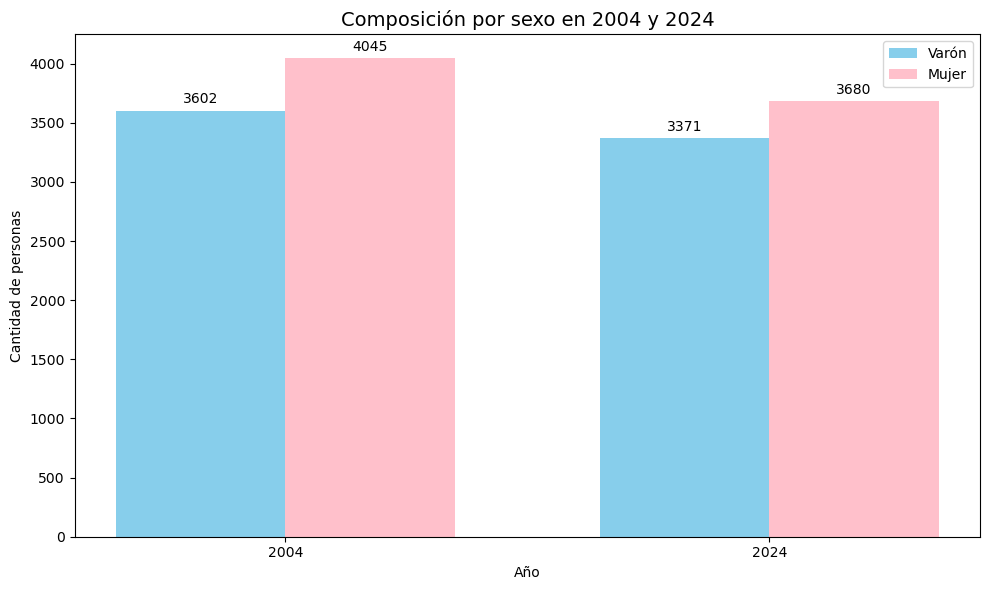

In [208]:
conteos = indgen.groupby(['ano4', 'ch04']).size().unstack()

# Configurar el gráfico
fig, ax = plt.subplots(figsize=(10, 6))

# Posiciones en el eje X para los años
n = len(conteos.index)
indice = np.arange(n)
ancho_barra = 0.35

# Barras para Varón y Mujer
barra_varon = ax.bar(
    indice - ancho_barra/2,
    conteos['Varón'],
    ancho_barra,
    label='Varón',
    color='skyblue'
)

barra_mujer = ax.bar(
    indice + ancho_barra/2,
    conteos['Mujer'],
    ancho_barra,
    label='Mujer',
    color='pink'
)

# Personalizar el gráfico
ax.set_title("Composición por sexo en 2004 y 2024", fontsize=14)
ax.set_xticks(indice)
ax.set_xticklabels(conteos.index.astype(int))  # Convertir años a enteros
ax.set_xlabel('Año')
ax.set_ylabel('Cantidad de personas')
ax.legend()

# Añadir etiquetas con los valores
for bar in barra_varon + barra_mujer:
    height = bar.get_height()
    ax.annotate(
        f'{height}',
        xy=(bar.get_x() + bar.get_width() / 2, height),
        xytext=(0, 3),
        textcoords='offset points',
        ha='center',
        va='bottom'
    )

plt.tight_layout()
plt.show()

In [210]:
ind4 = ind[["ano4","ch04","ch06","ch07", "ch08", "nivel_ed", "estado", "cat_inac", "ipcf"]] 
ind4

,ano4,ch04,ch06,ch07,ch08,nivel_ed,estado,cat_inac,ipcf
0,2004.0,Varón,79.0,Viudo,Obra social (incluye PAMI),Secundaria Incompleta,Inactivo,Jubilado/pensionado,368.0
1,2004.0,Mujer,67.0,Separado o divorciado,No paga ni le descuentan,Primaria Completa,Ocupado,0.0,0.0
2,2004.0,Mujer,74.0,Viudo,Obra social (incluye PAMI),Primaria Completa,Inactivo,Jubilado/pensionado,440.0
3,2004.0,Varón,54.0,Casado,Mutual/Prepaga/Servicio de emergencia,Primaria Completa,Ocupado,0.0,532.5
4,2004.0,Mujer,51.0,Casado,Mutual/Prepaga/Servicio de emergencia,Superior Universitaria Completa,Inactivo,Ama de casa,532.5
...,...,...,...,...,...,...,...,...,...
46045,2024.0,2,43,3,1,3,1,0,0.0
46046,2024.0,1,21,5,1,3,0,0,0.0
46047,2024.0,1,20,5,1,3,0,0,0.0
46048,2024.0,1,11,5,1,3,0,0,0.0


In [212]:
ind4.loc[:, "ch04"] = ind4["ch04"].replace({1: "Varón", 2: "Mujer"})
ind4.loc[:, "ch07"] = ind4["ch07"].replace({1: "Unido", 2: "Casado", 3: "Separado/a o divorciado/a", 4: "Viudo/a", 5: "Soltero/a"})
ind4.loc[:, "ch08"] = ind4["ch08"].replace({1: "Obra social (incluye PAMI)", 2: "Mutual / prepaga / servicio de emergencia", 3: "Planes y seguros públicos", 4:"No paga ni le descuentan", 9:"Ns/Nr", 12:"Obra social y mutual / prepaga / servicio de emergencia", 13:"Obra social y planes y seguros públicos", 23:"Mutual / prepaga / servicio de emergencia / Planes y seguros públicos", 123:"Obra social, mutual / prepaga / servicio de emergencia y planes y seguros públicos"})
ind4.loc[:, "nivel_ed"] = ind4["nivel_ed"].replace({1: "Primaria Incompleta (incluye educación especial)", 2: "Primario completo", 3:"Secundario incompleto", 4:"Secundario completo", 5:"Superior universitario incompleto", 6:"Superior universitario completo", 7:"Sin instrucción", 9:"Ns/Nr"})
ind4.loc[:, "estado"] = ind4["estado"].replace({0: "Entrevista individual no realizada (no respuesta al cuestionario individual)", 1: "Ocupado", 2:"Desocupado", 3:"Inactivo", 4:"Menor de 10 años"})
ind4.loc[:, "cat_inac"] = ind4["cat_inac"].replace({0:"Ns/Nr", 1: "Jubilado / Pensionado", 2: "Rentista", 3:"Estudiante", 4:"Ama de casa", 5:"Menor de 6 años", 6:"Discapacitado", 7:"Otros"})

ind4

,ano4,ch04,ch06,ch07,ch08,nivel_ed,estado,cat_inac,ipcf
0,2004.0,Varón,79.0,Viudo,Obra social (incluye PAMI),Secundaria Incompleta,Inactivo,Jubilado/pensionado,368.0
1,2004.0,Mujer,67.0,Separado o divorciado,No paga ni le descuentan,Primaria Completa,Ocupado,Ns/Nr,0.0
2,2004.0,Mujer,74.0,Viudo,Obra social (incluye PAMI),Primaria Completa,Inactivo,Jubilado/pensionado,440.0
3,2004.0,Varón,54.0,Casado,Mutual/Prepaga/Servicio de emergencia,Primaria Completa,Ocupado,Ns/Nr,532.5
4,2004.0,Mujer,51.0,Casado,Mutual/Prepaga/Servicio de emergencia,Superior Universitaria Completa,Inactivo,Ama de casa,532.5
...,...,...,...,...,...,...,...,...,...
46045,2024.0,Mujer,43,Separado/a o divorciado/a,Obra social (incluye PAMI),Secundario incompleto,Ocupado,Ns/Nr,0.0
46046,2024.0,Varón,21,Soltero/a,Obra social (incluye PAMI),Secundario incompleto,Entrevista individual no realizada (no respues...,Ns/Nr,0.0
46047,2024.0,Varón,20,Soltero/a,Obra social (incluye PAMI),Secundario incompleto,Entrevista individual no realizada (no respues...,Ns/Nr,0.0
46048,2024.0,Varón,11,Soltero/a,Obra social (incluye PAMI),Secundario incompleto,Entrevista individual no realizada (no respues...,Ns/Nr,0.0


In [238]:
ind4.loc[:, "ch04"] = ind4["ch04"].replace({"Varón": 1, "Mujer": 2})
ind4.loc[:, "ch07"] = ind4["ch07"].replace({"Unido": 1, "Casado": 2, "Separado/a o divorciado/a": 3, "Viudo": 4 , "Soltero/a": 5})
ind4.loc[:, "ch08"] = ind4["ch08"].replace({"Obra social (incluye PAMI)": 1, "Mutual/Prepaga/Servicio de emergencia": 2 , "Planes y seguros públicos": 3, "No paga ni le descuentan": 4, "Ns./Nr.": 9, "Obra social y mutual/prepaga/servicio de emergencia": 12, "Obra social y planes y seguros públicos": 13, "Mutual / prepaga / servicio de emergencia / Planes y seguros públicos": 23, "Mutual/prepaga/servicio de emergencia/planes y seguros públi": 123})
ind4.loc[:, "nivel_ed"] = ind4["nivel_ed"].replace({"Primaria Incompleta (incluye educación espacial)": 1, "Primaria Completa": 2, "Secundario incompleto": 3, "Secundaria Completa": 4, "Superior universitario incompleto": 5, "Superior Universitaria Completa": 6, "Sin instrucción": 7, "Ns./Nr.": 9})
ind4.loc[:, "estado"] = ind4["estado"].replace({"Entrevista individual no realizada (no respuesta a la cuestion)": 0, "Ocupado": 1, "Desocupado": 2, "Inactivo": 3, "Menor de 10 años": 4})
ind4.loc[:, "cat_inac"] = ind4["cat_inac"].replace({"Ns/Nr": 0, "Jubilado/pensionado": 1, "Rentista": 2, "Estudiante": 3, "Ama de casa": 4, "Menor de 6 años": 5, "Discapacitado": 6 , "Otros": 7})
ind4.loc[:, "ch06"] = ind4["ch06"].replace({"Menos de 1 año": 0, "98 y más años": 100})

ind4

,ano4,ch04,ch06,ch07,ch08,nivel_ed,estado,cat_inac,ipcf
0,2004.0,1,79.0,4,1,3,3,1,368.0
1,2004.0,2,67.0,3,4,2,1,0,0.0
2,2004.0,2,74.0,4,1,2,3,1,440.0
3,2004.0,1,54.0,2,2,2,1,0,532.5
4,2004.0,2,51.0,2,2,6,3,4,532.5
...,...,...,...,...,...,...,...,...,...
46045,2024.0,2,43,3,1,3,1,0,0.0
46046,2024.0,1,21,5,1,3,Entrevista individual no realizada (no respues...,0,0.0
46047,2024.0,1,20,5,1,3,Entrevista individual no realizada (no respues...,0,0.0
46048,2024.0,1,11,5,1,3,Entrevista individual no realizada (no respues...,0,0.0


In [216]:
print(ind4.columns)

Index(['ano4', 'ch04', 'ch06', 'ch07', 'ch08', 'nivel_ed', 'estado',
       'cat_inac', 'ipcf'],
      dtype='object')


In [226]:
print(ind[["ano4", "ch04", "ch06", "ch07", "ch08", "estado", "nivel_ed", "cat_inac", "ipcf"]].dtypes)


ano4        float64
ch04         object
ch06         object
ch07         object
ch08         object
estado       object
nivel_ed     object
cat_inac     object
ipcf        float64
dtype: object


In [228]:
cols = ["ch04", "ch06", "ch07", "ch08", "estado", "nivel_ed", "cat_inac"]
for col in cols:
    ind[col] = pd.to_numeric(ind[col], errors='coerce')

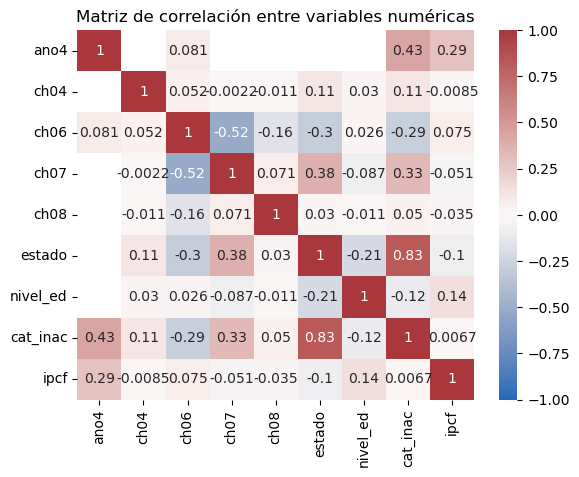

In [242]:
numericas = ind[["ano4", "ch04", "ch06", "ch07", "ch08", "estado", "nivel_ed", "cat_inac", "ipcf"]]
sns.heatmap(numericas.corr(), annot=True, cmap="vlag", vmin=-1, vmax=1)
plt.title("Matriz de correlación entre variables numéricas")
plt.show()

#Las interpretaciones que hacemos aca son:
#Con ano4 (años) tiene una correlacion de 0.43 con cat_inac lo que significaría que a medida que avanzan los años, la proporcion de personas inactivas aumenta. Tambien tiene una correlacion de 0.29 con ipcf, lo que supondria indicar que los ingresos per capita familiares tienden a aumentar con el paso de los años
#Con ch04 (sexo) tiene todas las correlaciones muy bajas (<0.1), lo que quiere decir que no parece haber una diferencia grande en las otras variables segun el sexo.
#Con ch06 (edad) tiene una correlacion negativa (-0.29) con cat_inac. Aca es raro porque se esperaria que a mayor edad, mas inactividad....
#Con ch07 (estado civil) tiene una correlacion negativa (-0.52) con ch07 lo que vendria a ser muy logico ya que a menor edad, menos probabilidad de estar casado. Con cat_inac tiene una correlacion del (0.33) lo que vendria a decir que algunas categorias de estado civil (viudez o estar separado) estan relacionadas a estar inactivo/a. Con estado tiene una correlacion de (0.38) lo que significaria que estado y estado civil estan relacionados, por ejemplo, los casados tienen mayor probabilidad de estar activos que los viudos.
#Con ch08 tiene correlaciones muy bajas con todas las demas (<0.1) lo que significaria que la cobertura medica no esta muy relacionada al resto (medio engañoso esto)
#con estado (ocupado, desocupado, etc.) tiene una correlacion muy fuerte y logica con cat_inac (0.83) lo que significaria que ambas variables describen la condicion laboral. Con nivel_ed tiene una correlacion de (0. Una leve tendencia a que quienes tienen más educación estén algo más presentes en el mercado laboral